In [1]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import anndata

In [2]:
def readfiles():
    w_dir = 'GSE67835_RAW/'
    cell_list = []
    for file in os.listdir(w_dir):
        cell_list.append(pd.read_csv(w_dir+file,sep='\t',index_col=0,header=None))
    all_count_data = pd.concat(cell_list,axis=1)
    return all_count_data

In [3]:
raw_count = readfiles()

In [4]:
raw_count

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
A1BG,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,1,0,0,0,327,3,112,0,31,15,...,0,0,0,13,462,0,0,0,49,0
tAKR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
no_feature,863317,807483,1618098,569219,678967,2116891,1088846,1245695,1343260,822062,...,1138331,1187408,737563,776021,2164997,1228965,291694,1136953,2049257,2689735


In [5]:
# obviously, last 3 rows should be deleted from this count matrix
raw_count = raw_count.iloc[:-3,:]
raw_count

,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
0,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
A1BG,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1BG-AS1,0,0,0,0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A2LD1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11B,33,0,109,0,215,73,0,383,12,0,...,0,1,74,0,1,0,0,0,6,0
ZYX,0,0,0,0,28,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,45
ZZEF1,51,0,0,9,2,2,3,34,0,37,...,118,0,1,42,2,0,0,0,32,10


In [6]:
adata = sc.AnnData(X=raw_count.T)
adata

/Users/chan/opt/anaconda3/envs/pytorch/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 466 × 22085

In [7]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=150, color_map='viridis')
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.8.0
sinfo       0.3.4
-----
PIL                 8.2.0
appnope             0.1.2
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
cached_property     1.5.2
cffi                1.14.5
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
h5py                3.2.1
igraph              0.9.6
ipykernel           5.3.4
ipython_genutils    0.2.0
jedi                0.17.0
joblib              1.0.1
kiwisolver   

In [8]:
sc.pp.filter_cells(adata, min_genes=400)
sc.pp.filter_genes(adata, min_cells=5)
adata.obs['n_counts'] = adata.X.sum(axis=1)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


filtered out 3946 genes that are detected in less than 5 cells


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 466 × 18139
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

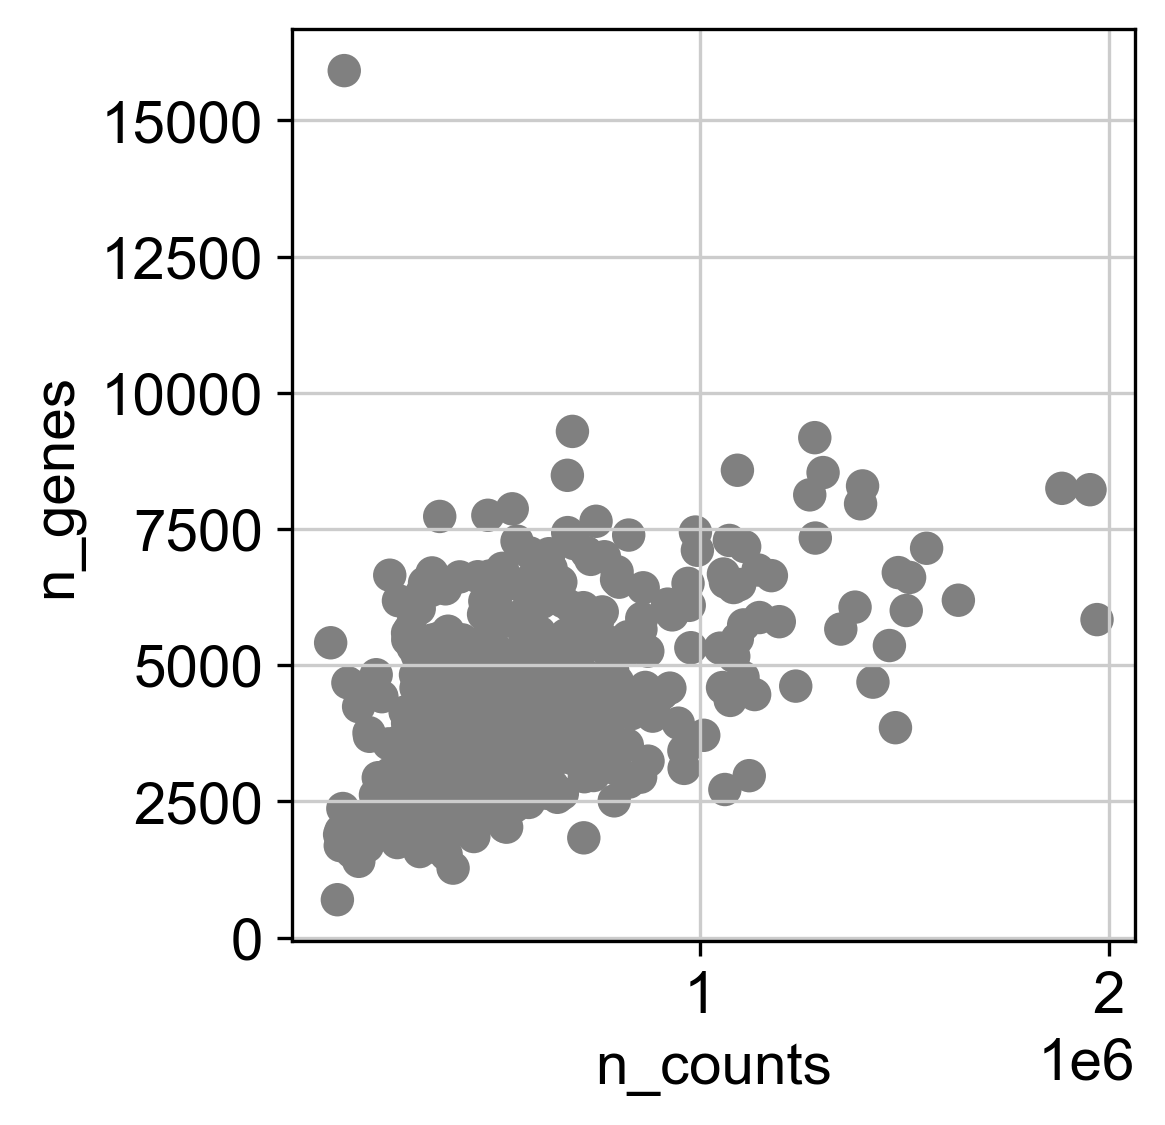

In [9]:
sc.pl.scatter(adata, x="n_counts", y='n_genes')

In [10]:
adata = adata[adata.obs['n_genes'] < 12500, :]
#adata = adata[adata.obs['n_counts'] < 4500, :]
adata.raw = sc.pp.log1p(adata, copy=True)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


AnnData object with n_obs × n_vars = 465 × 18139
    obs: 'n_genes', 'n_counts'
    var: 'n_cells'

In [11]:
sc.pp.normalize_per_cell(adata)

normalizing by total count per cell


Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [12]:
df = pd.DataFrame(adata.X)
df.columns = adata.var.index
df.to_csv("GSE67835_norm_counts_all.txt", sep="\t")

extracting highly variable genes
    finished (0:00:00)


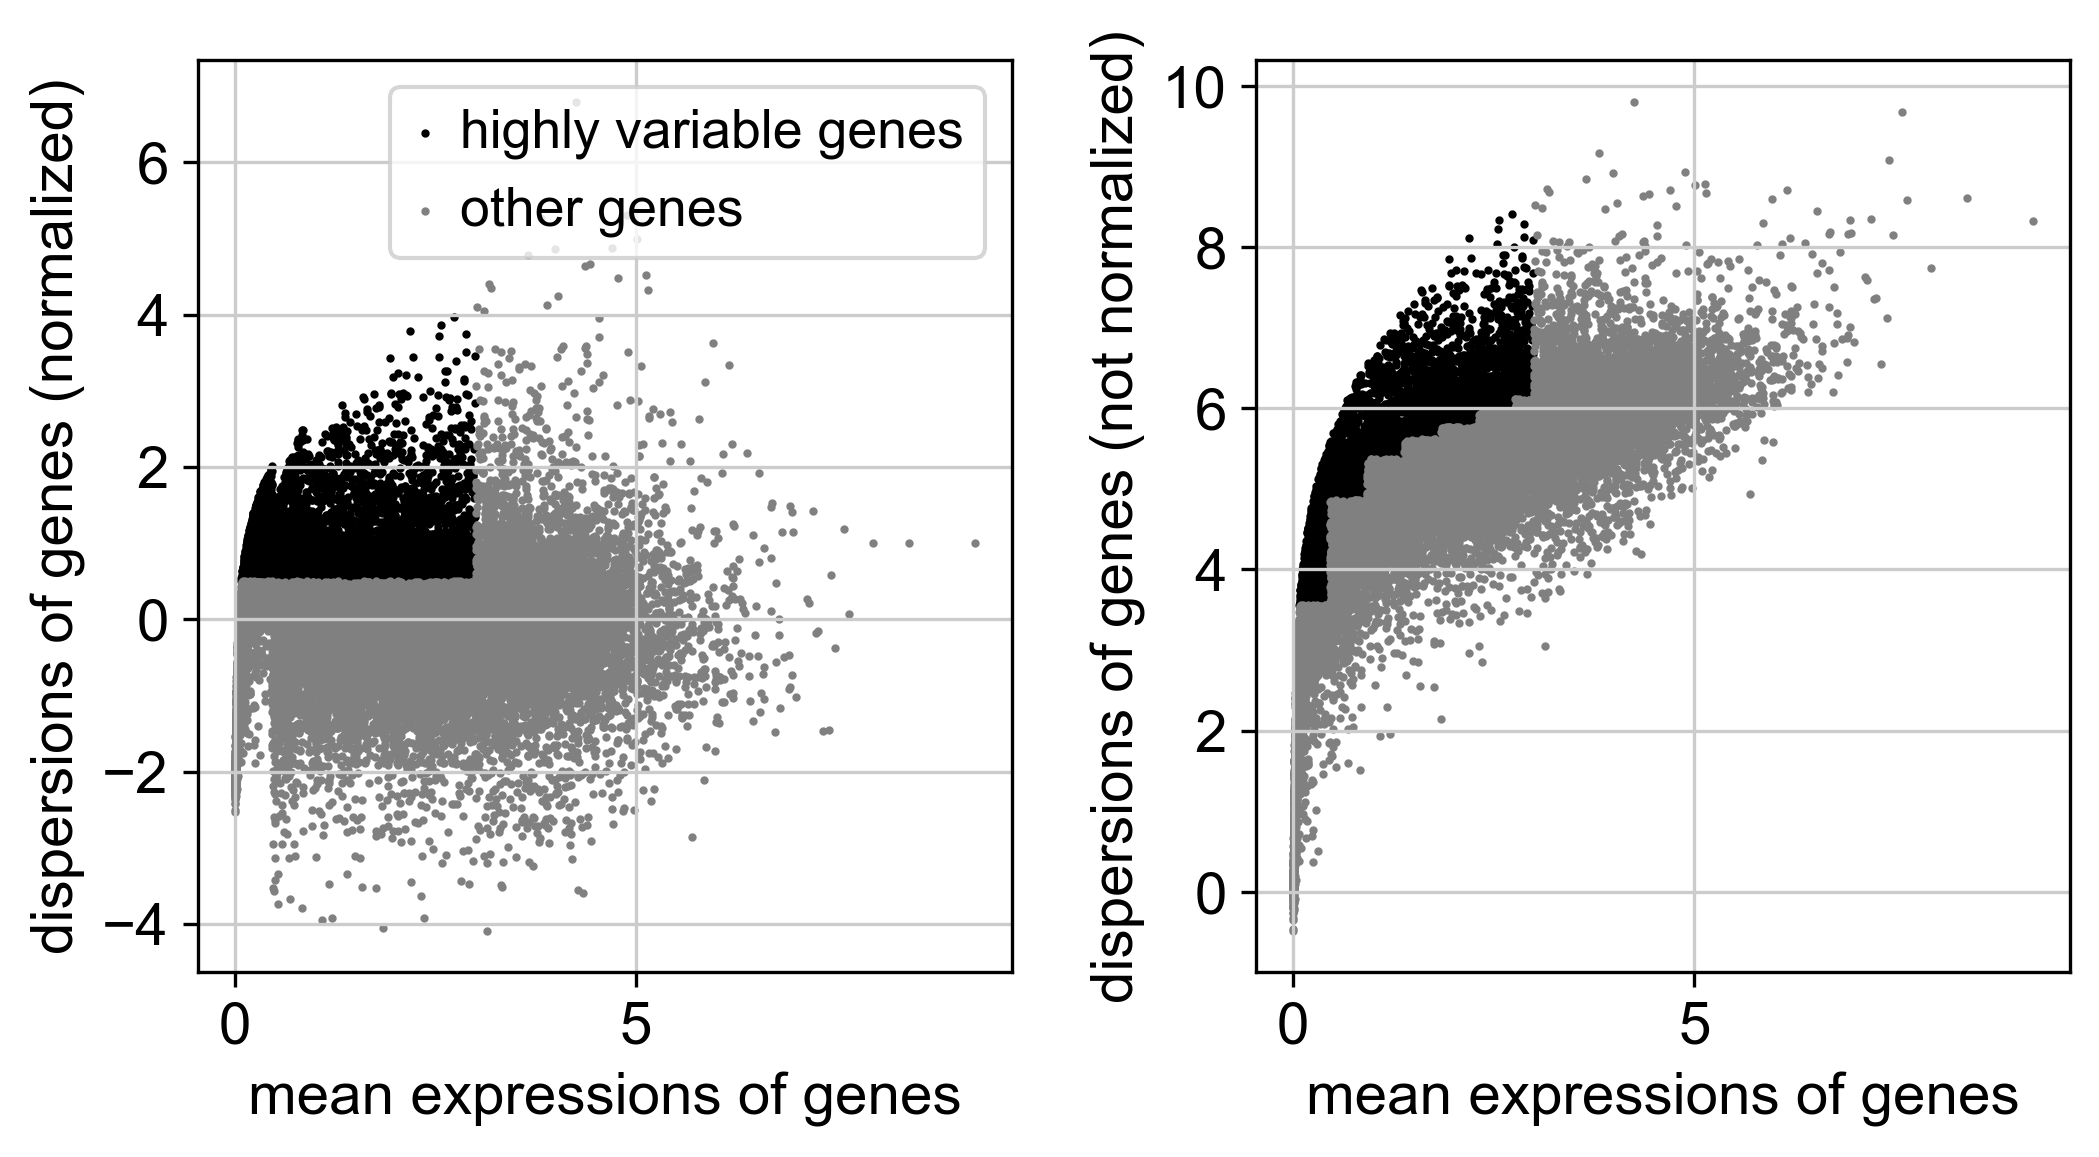

In [13]:
filter_result = sc.pp.filter_genes_dispersion(adata.X, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.filter_genes_dispersion(filter_result)

In [14]:
adata = adata[:, filter_result.gene_subset]
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.regress_out(adata, ['n_counts'])
sc.pp.scale(adata)

normalizing by total count per cell


Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
regressing out ['n_counts']
    finished (0:00:07)


In [15]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.tsne(adata)

computing neighbors
         Falling back to preprocessing with `sc.pp.pca` and default params.
computing PCA
    with n_comps=50
    finished (0:00:00)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:02)


In [16]:
sc.tl.leiden(adata, resolution=1.5)

running Leiden clustering
    finished: found 13 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


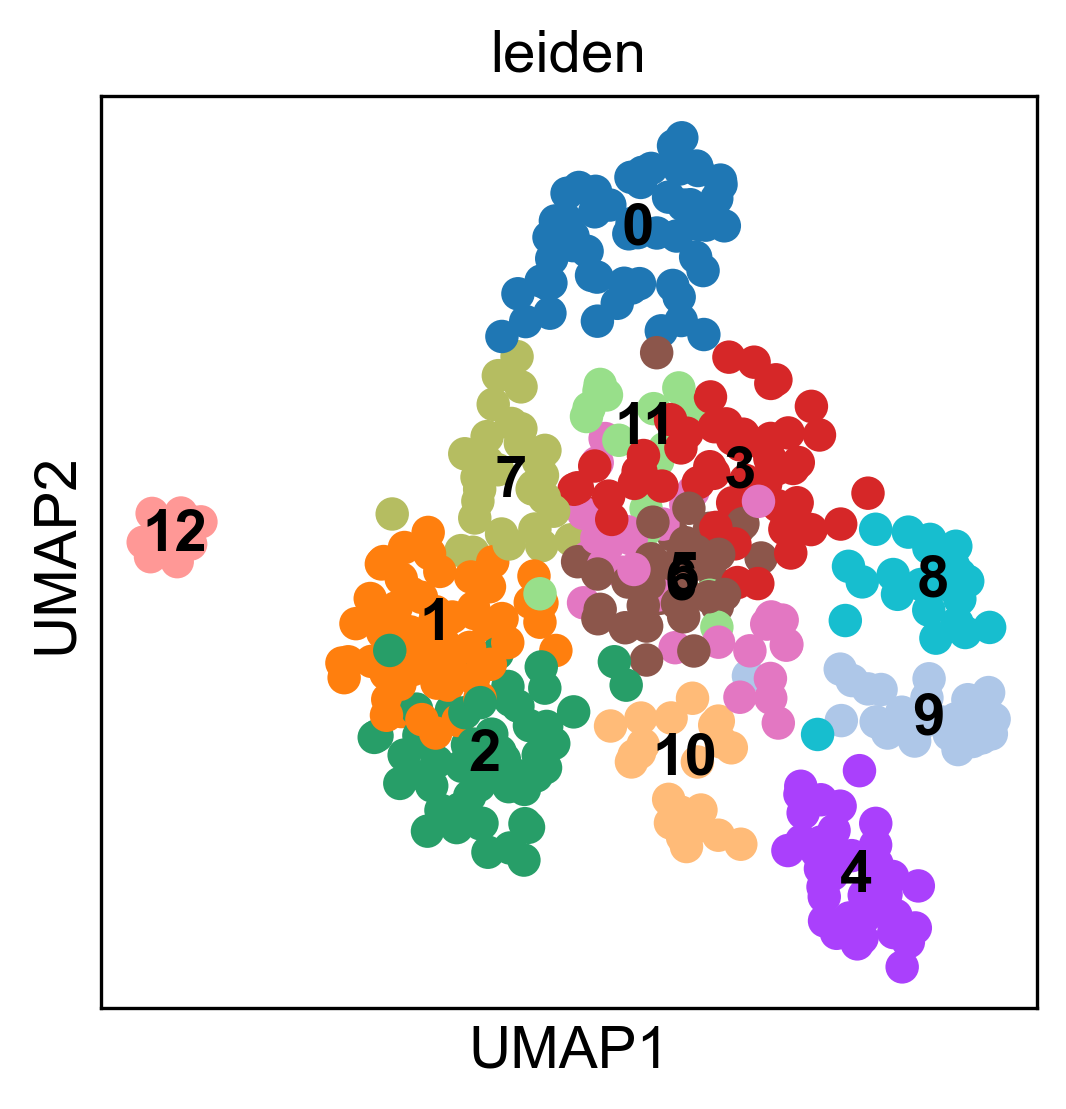

In [17]:
sc.pl.umap(adata, color='leiden', legend_loc='on data')

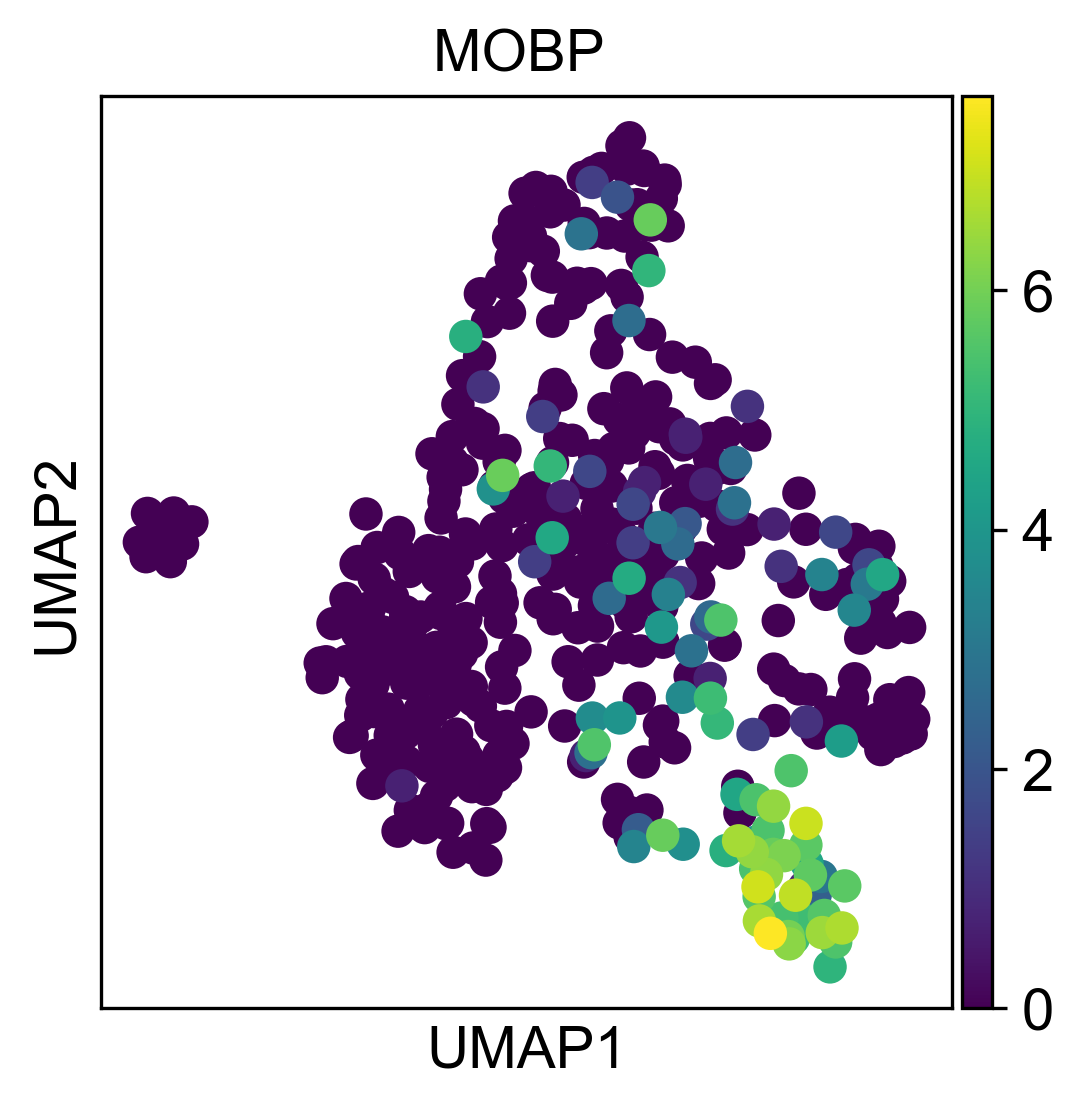

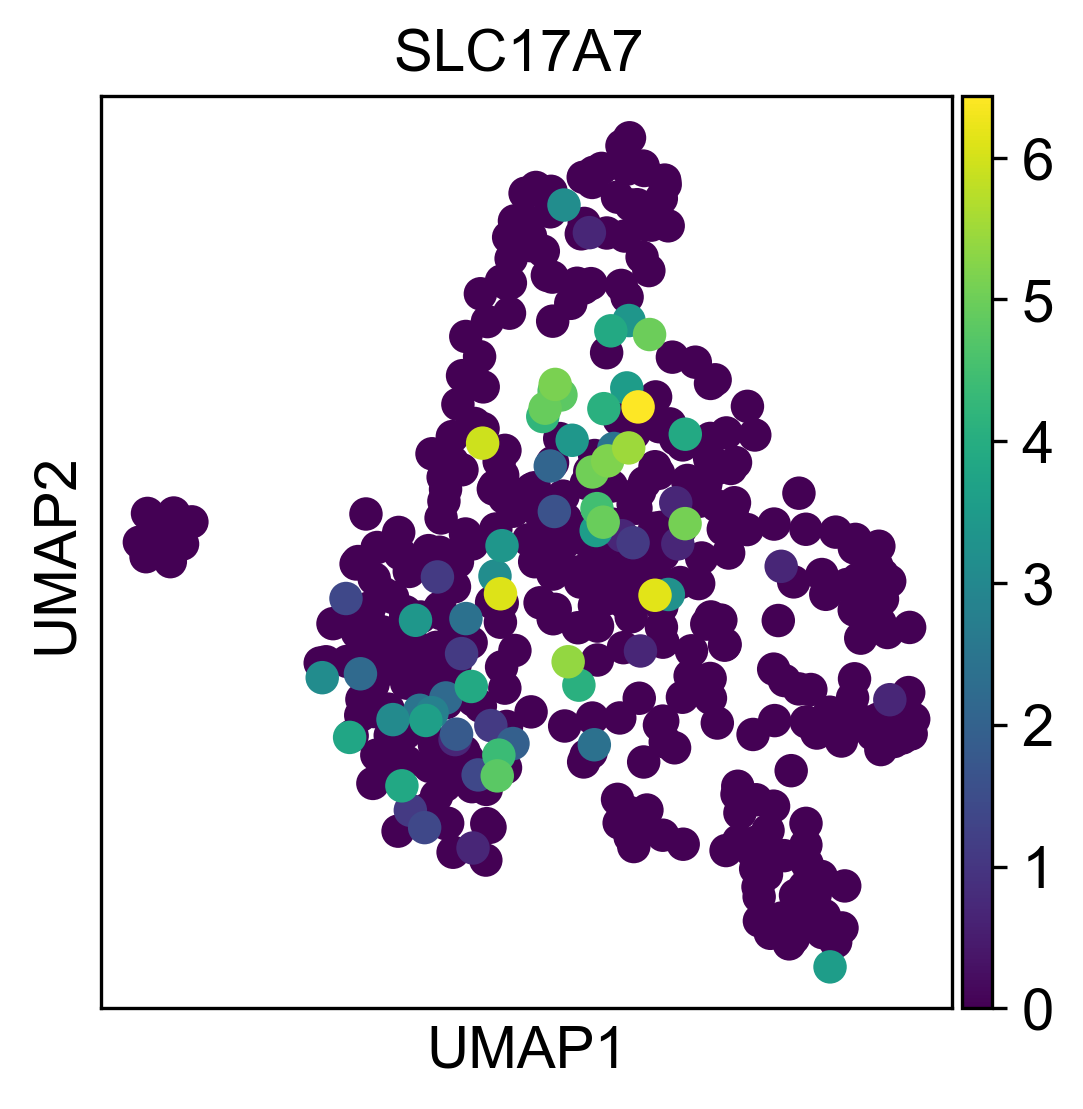

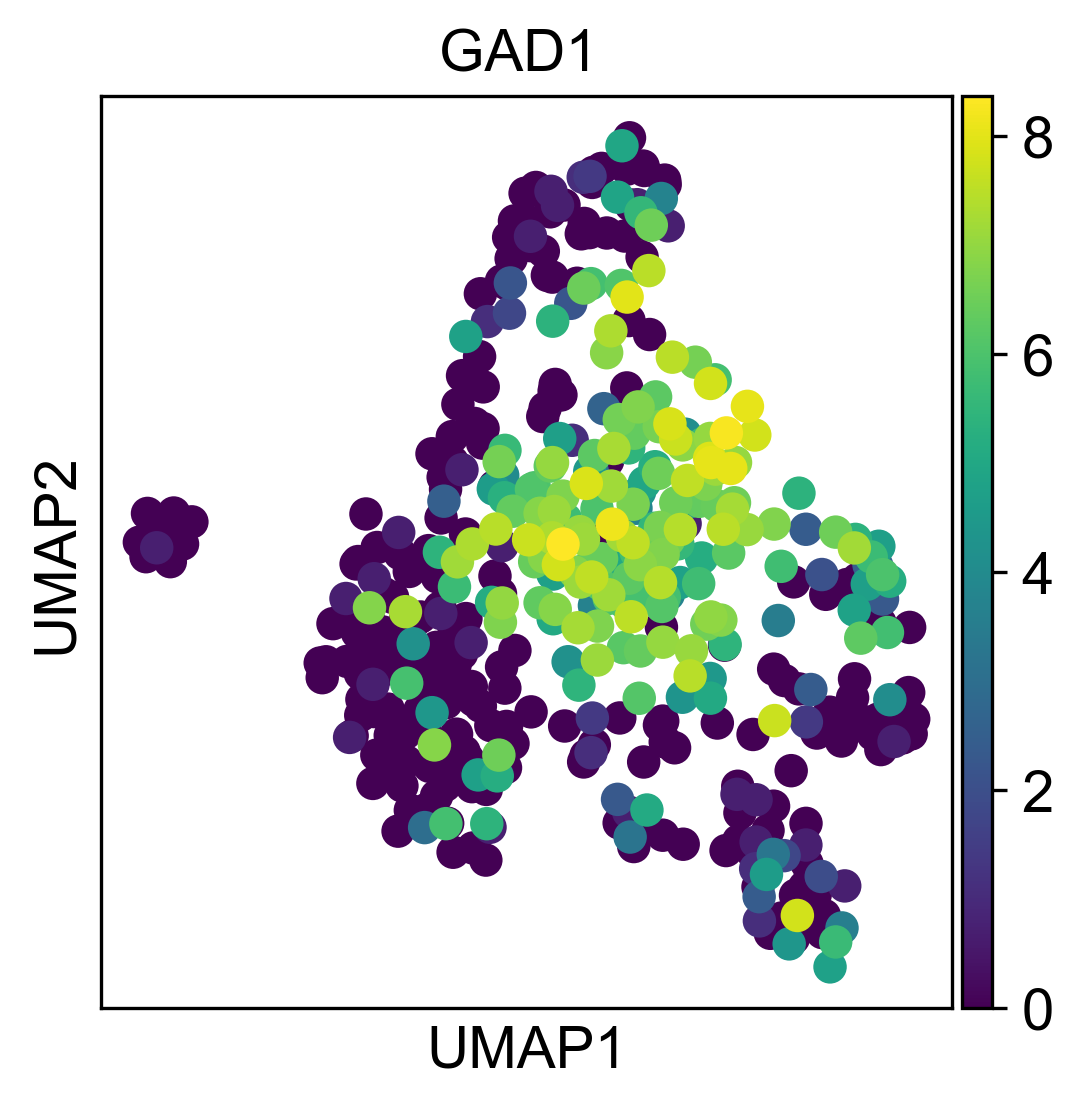

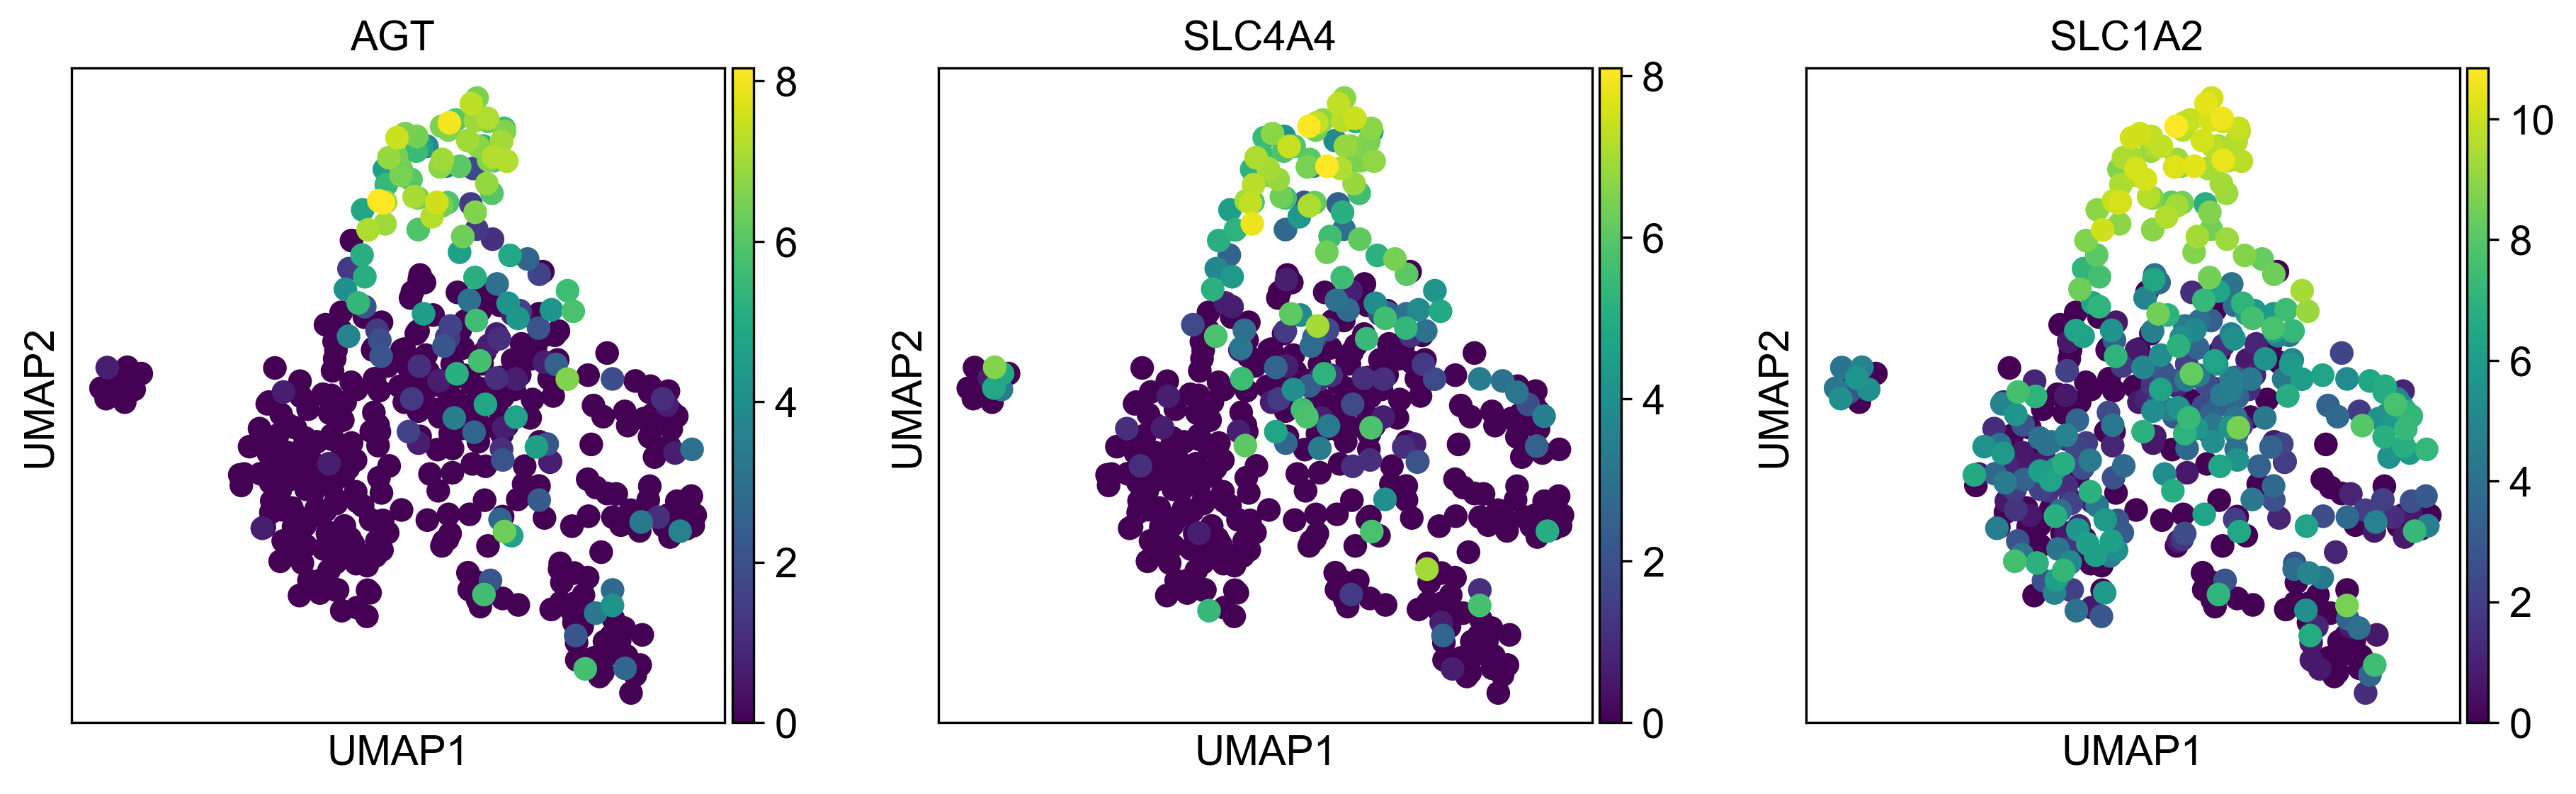

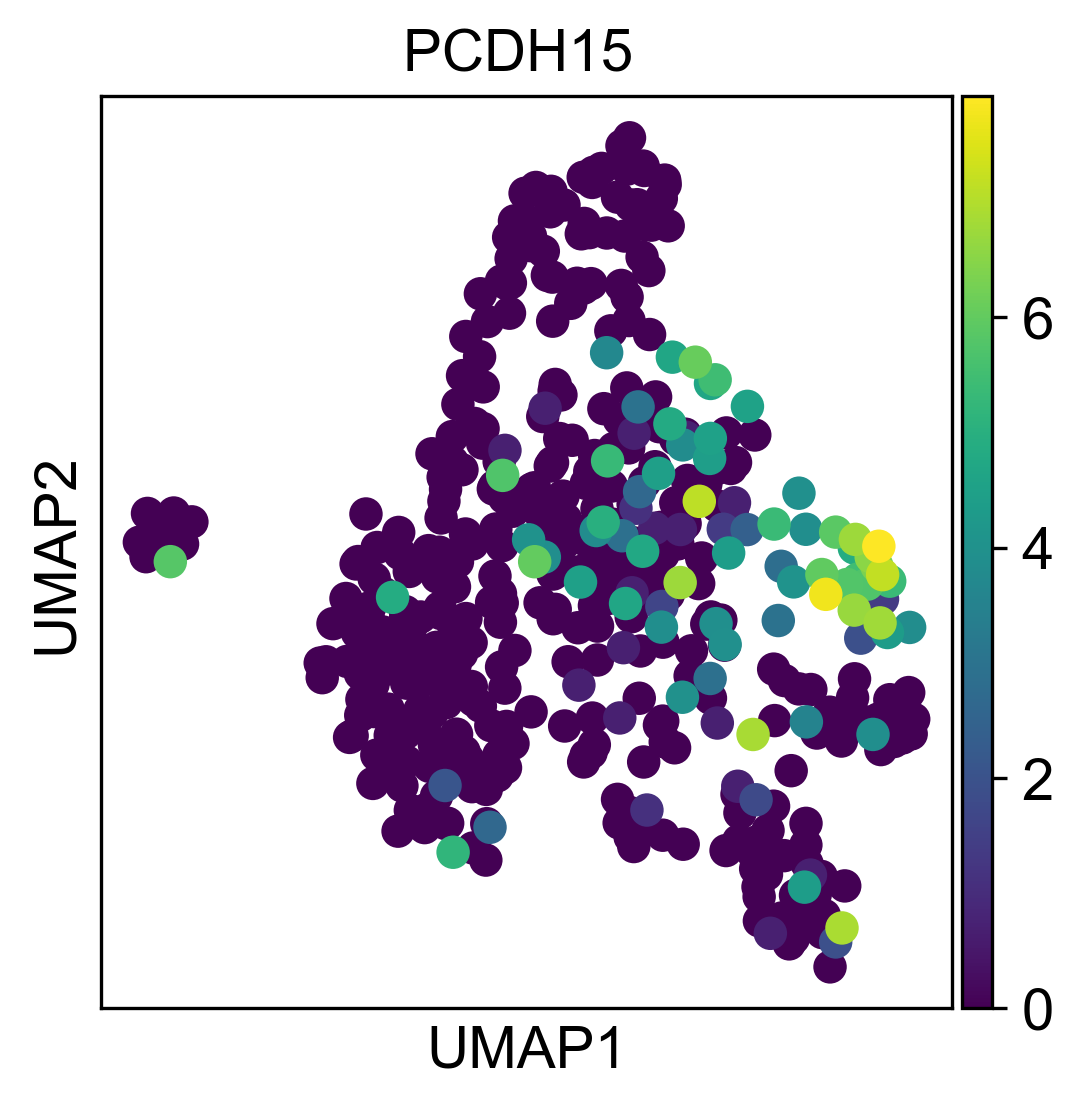

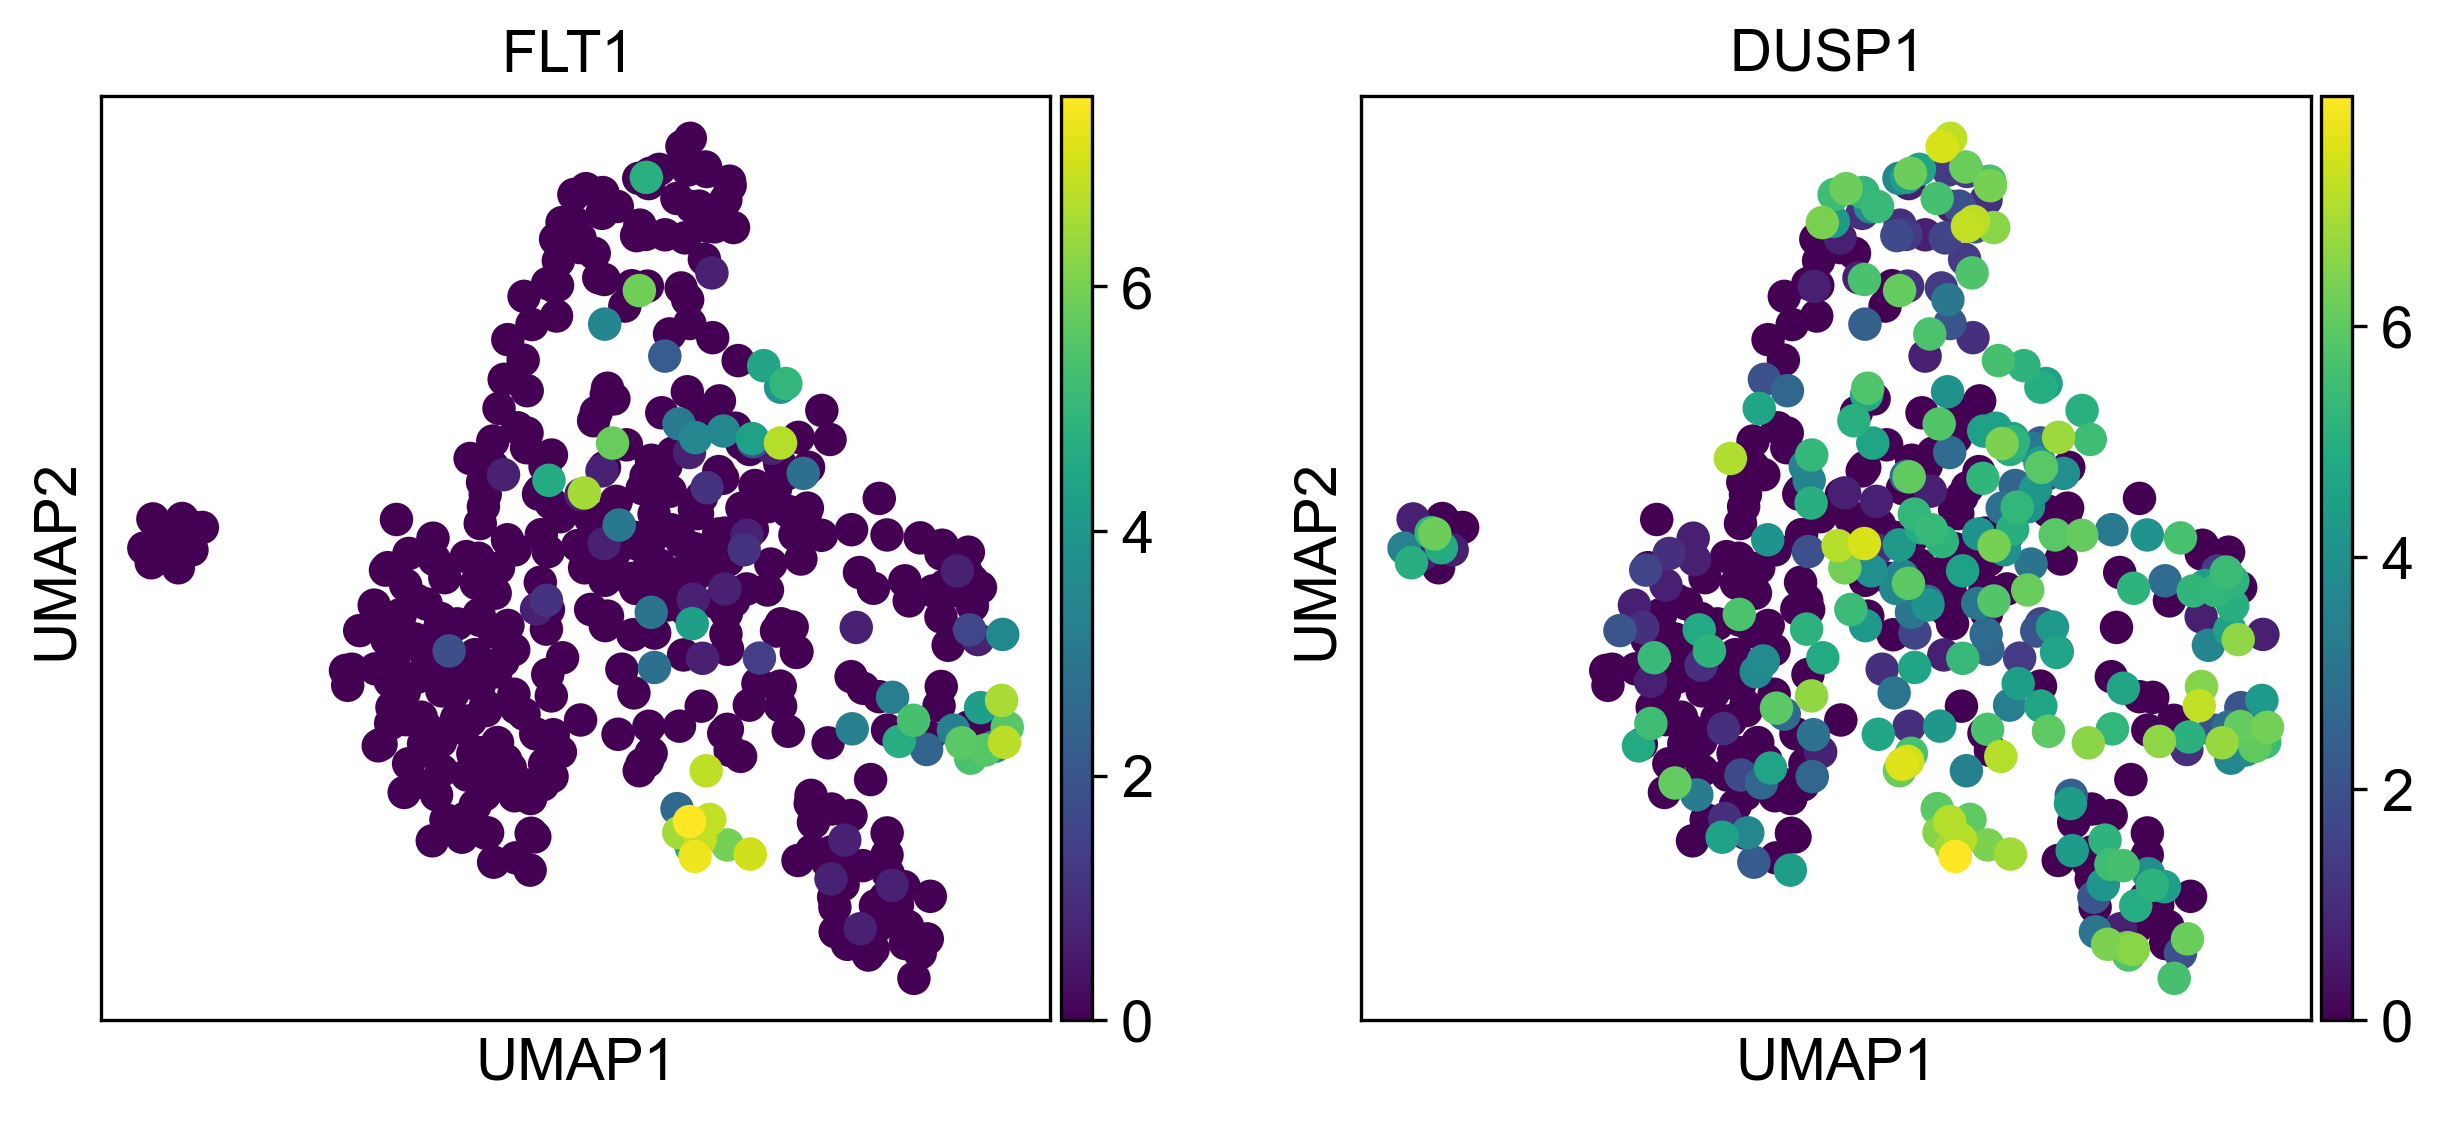

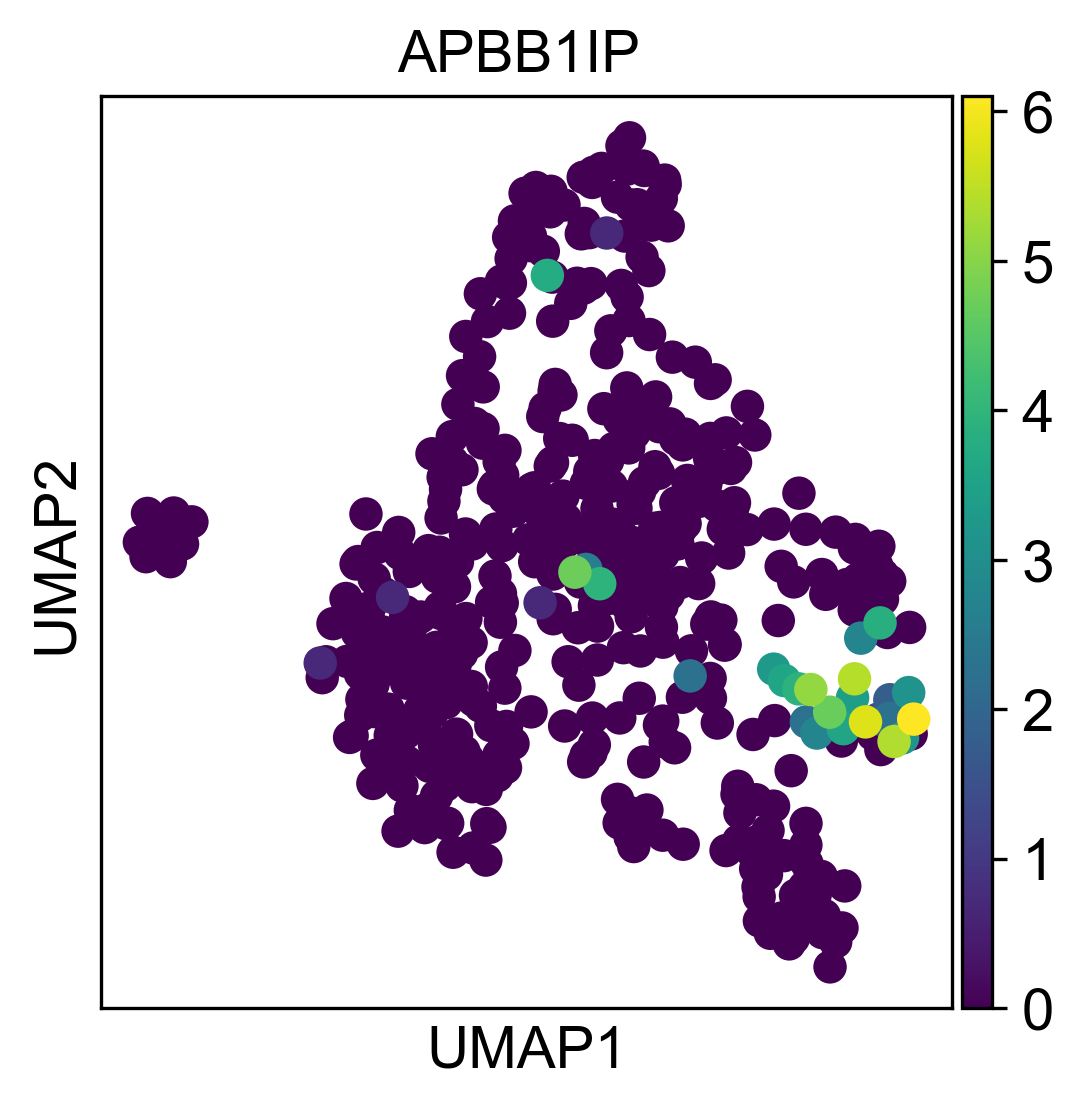

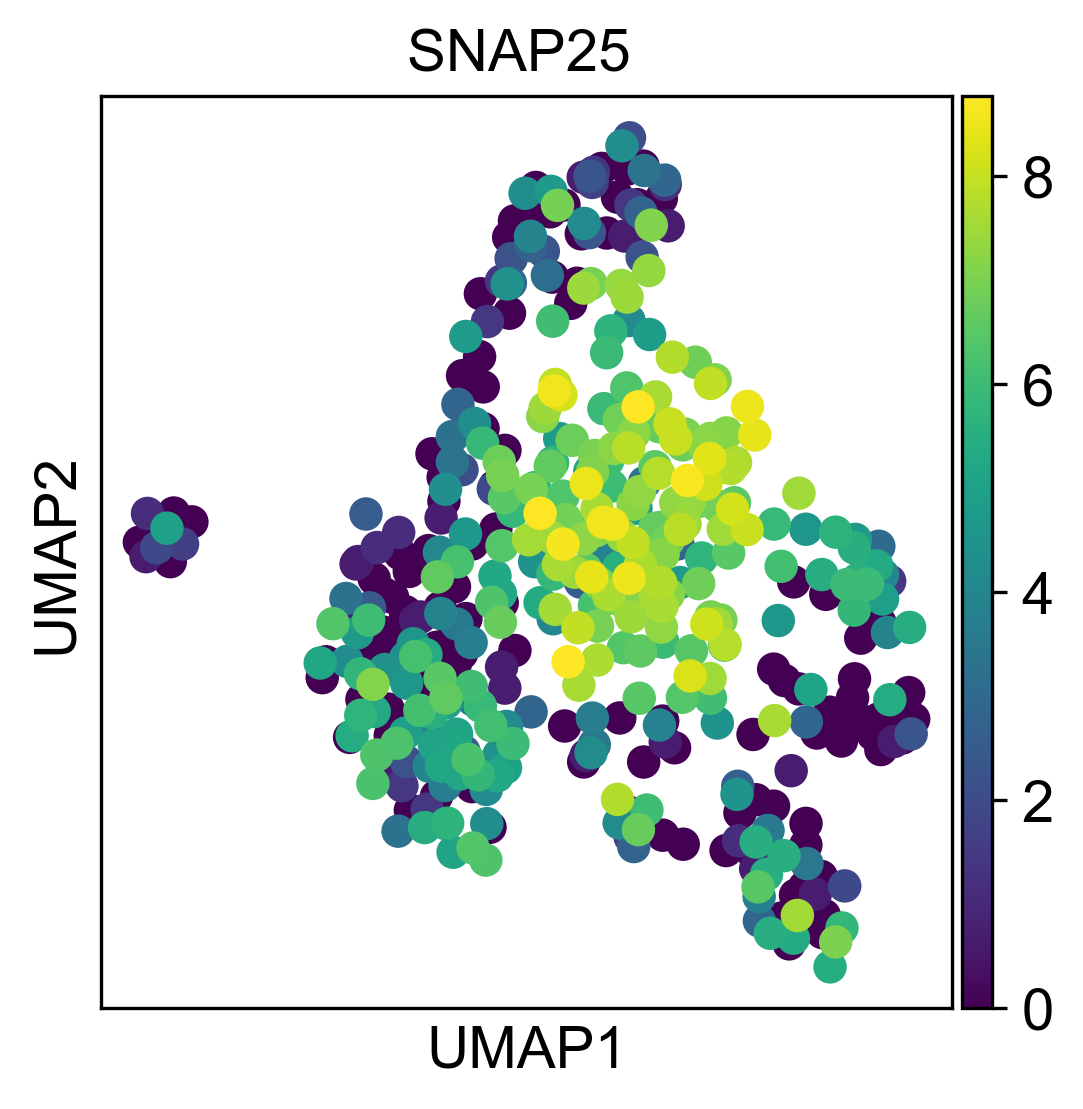

In [18]:
# Oligodendrocytes
sc.pl.umap(adata, color='MOBP ')
# Ex-Neurons
sc.pl.umap(adata, color='SLC17A7 ')
# In-Neurons
sc.pl.umap(adata, color='GAD1 ')
# Astrocytes
sc.pl.umap(adata, color=['AGT ', 'SLC4A4 ', 'SLC1A2 '])
# OPC
sc.pl.umap(adata, color='PCDH15 ')
# Endothelial
sc.pl.umap(adata, color=['FLT1 ', 'DUSP1 '])
# Microglia
sc.pl.umap(adata, color=['APBB1IP '])
# ?
sc.pl.umap(adata, color=['SNAP25 '])

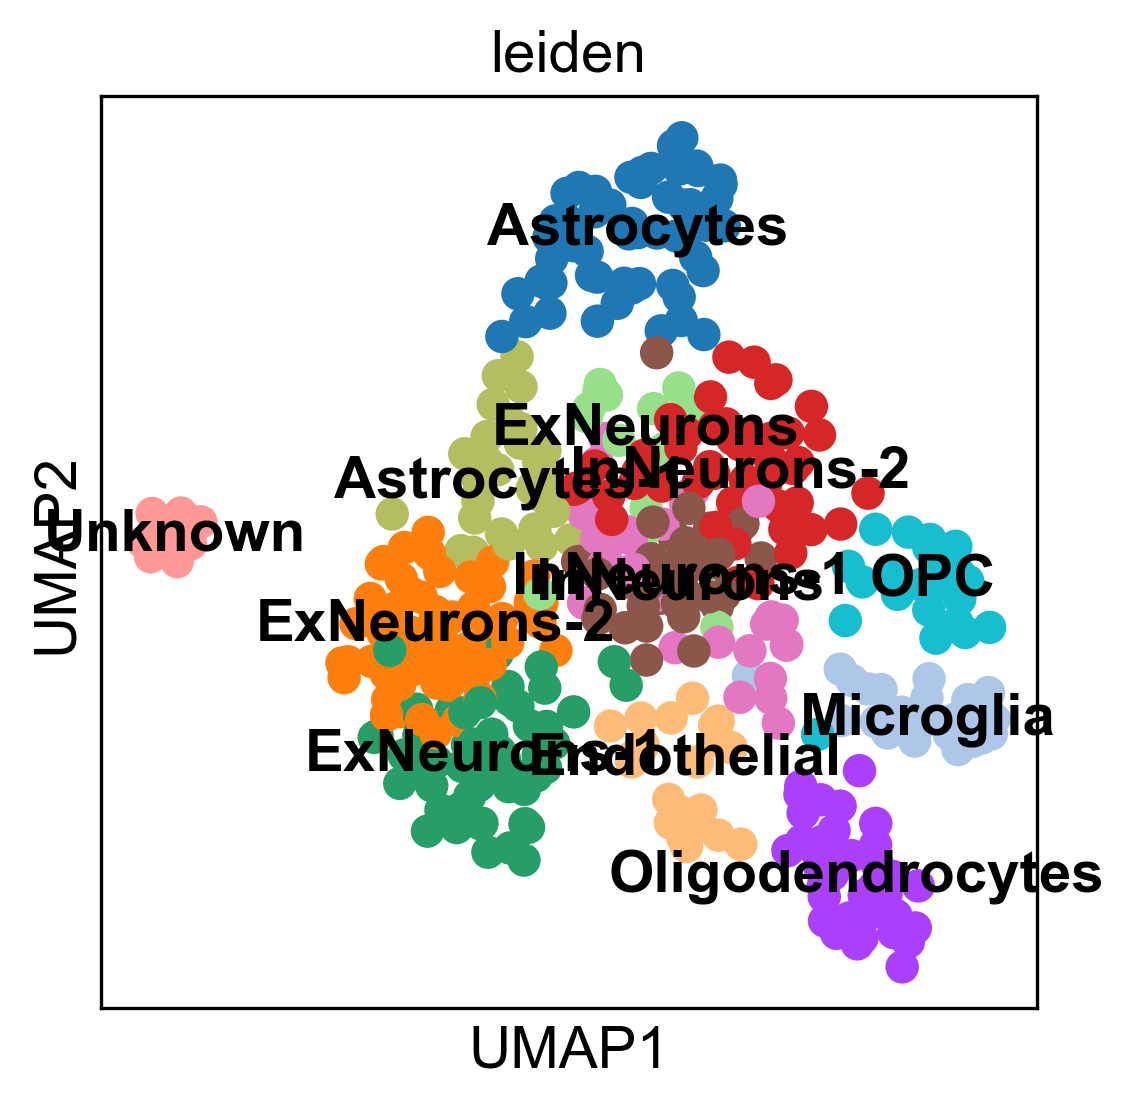

In [19]:
newcelltypes = ['Astrocytes','ExNeurons-2','ExNeurons-1','InNeurons-2','Oligodendrocytes',
                'InNeurons-1','InNeurons','Astrocytes-1','OPC','Microglia','Endothelial','ExNeurons','Unknown']
adata.rename_categories('leiden', newcelltypes)
sc.pl.umap(adata, color='leiden', legend_loc='on data')

... storing 'celltype' as categorical


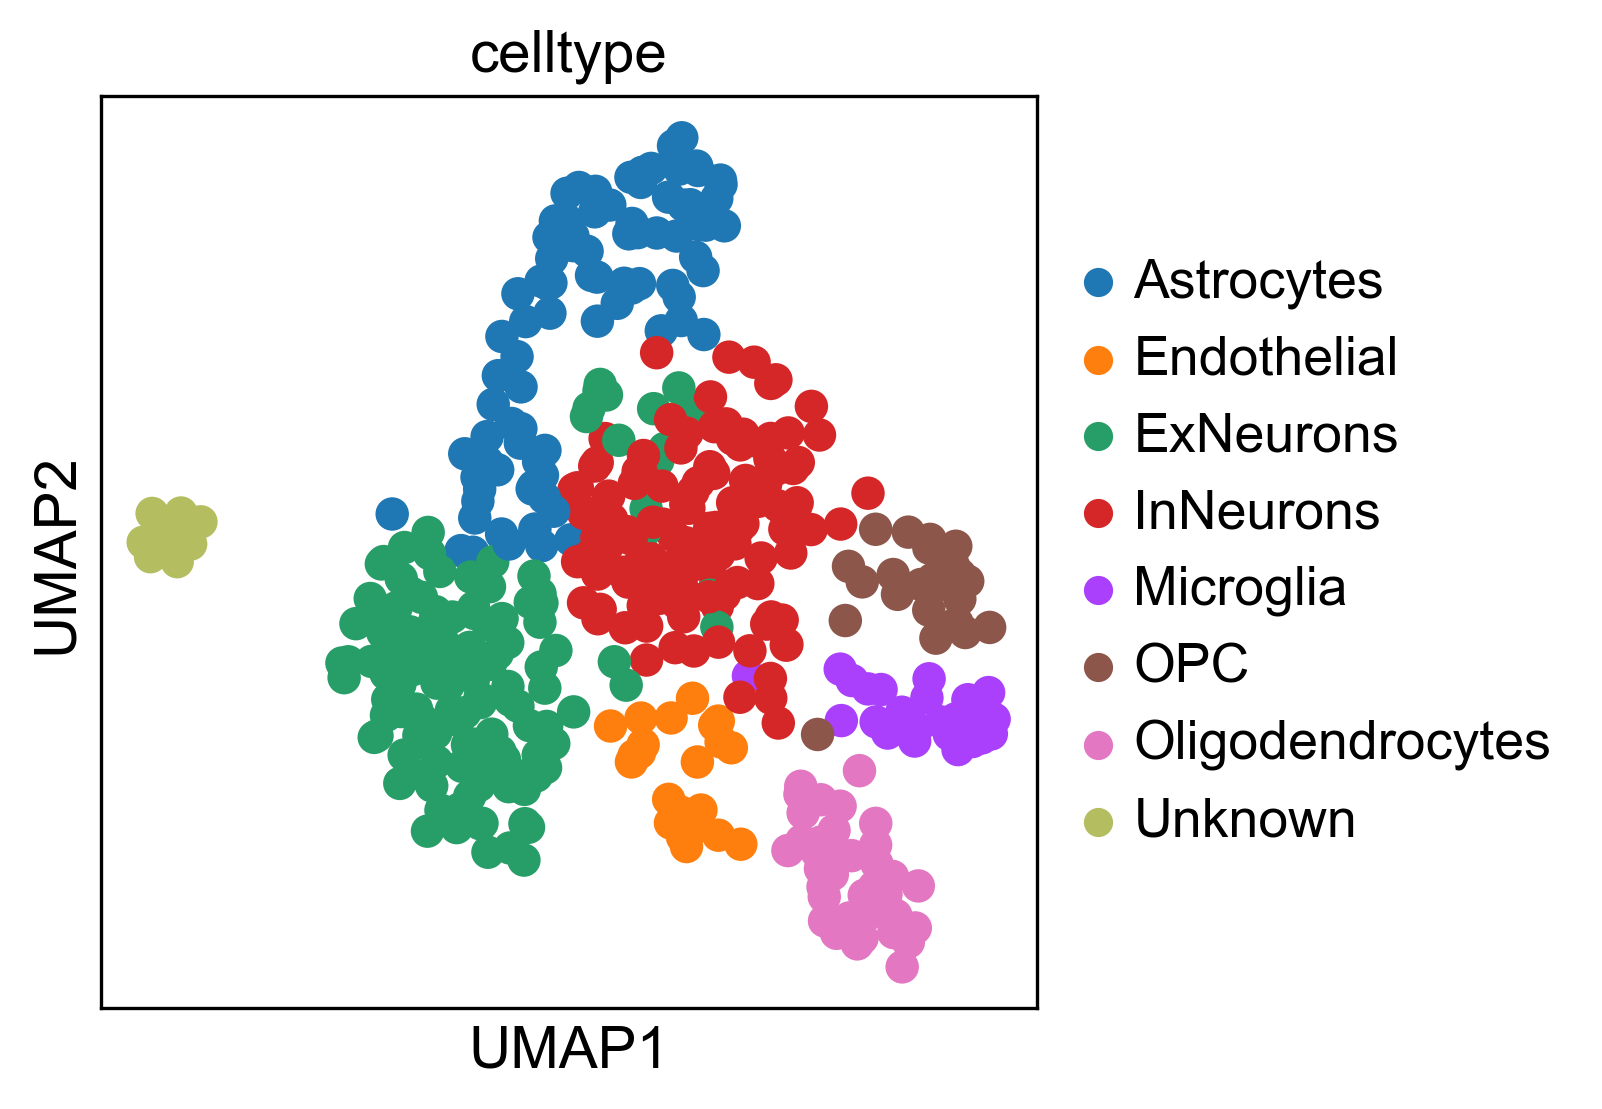

In [20]:
celltypes = pd.DataFrame(adata.obs['leiden'])
celltypes.leiden.replace(['ExNeurons-1', 'ExNeurons-2', 'InNeurons-1', 'InNeurons-2', 'Astrocytes-1'],
                         ['ExNeurons', 'ExNeurons','InNeurons', 'InNeurons', 'Astrocytes'], inplace=True)
adata.obs['celltype'] = celltypes.leiden
sc.pl.umap(adata, color='celltype')

In [21]:
celltypes = pd.DataFrame(adata.obs['celltype'])
celltypes.columns = ['Celltype']
celltypes.to_csv("GSE67835_celltypes.txt", sep="\t")